In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import keras
from keras import backend as K
from keras.layers import Reshape
from keras.models import load_model
import tensorflowjs as tfjs

import sys
sys.path.append('..')

import tcvae
from tcvae.layers import Variational
from tcvae.models.square_128 import make_encoder_7_convs, make_decoder_7_deconvs

# tf.compat.v1.disable_eager_execution()

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load old models, convert, then save

In [3]:
decoder_weights_path = \
    '../experiments/tcvae-dssim-0-128-1/model/decoder-weights.h5'

In [4]:
K.clear_session()
decoder_new = make_decoder_7_deconvs()
decoder_new.load_weights(decoder_weights_path)
tfjs.converters.save_keras_model(decoder_new, '../app/static/decoder-new')

/opt/anaconda3/envs/tcvae/lib/python3.7/site-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [5]:
output = decoder_new.predict(np.zeros([1, 32])).squeeze()

In [7]:
np.save('recon', output)

In [ ]:
plt.plot([0, 10], [0, 10])

In [ ]:
plt.imshow(output)

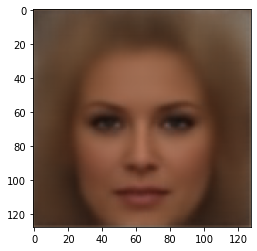

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.load('recon.npy'))

In [49]:
K.eval(decoder.layers[2].weights[0])

TypeError: An op outside of the function building code is being passed
a "Graph" tensor. It is possible to have Graph tensors
leak out of the function building context by including a
tf.init_scope in your function building code.
For example, the following function will fail:
  @tf.function
  def has_init_scope():
    my_constant = tf.constant(1.)
    with tf.init_scope():
      added = my_constant * 2
The graph tensor has name: conv2d_transpose_1/kernel:0

In [36]:
K.clear_session()
decoder = load_model(
    '../experiments/tcvae-dssim-0-128-1/model/decoder.h5')
decoder_weights = decoder.save_weights(decoder_weights_path)
tfjs.converters.save_keras_model(decoder, '../app/static/decoder-new')

custom_objects = dict(Variational=Variational)
encoder = load_model(
    '../experiments/tcvae-dssim-0-128-1/model/encoder.h5',
    custom_objects=custom_objects)
tfjs.converters.save_keras_model(encoder, '../app/static/encoder')

/opt/anaconda3/envs/tcvae/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
/opt/anaconda3/envs/tcvae/lib/python3.7/site-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
